In [1]:
# start by importing all necessary libraries
import numpy as np
import pandas as pd
from os import path
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = '../data/reddit_train.csv'
data = pd.read_csv(file_path)
data = data.drop(columns={'id'})
data.tail()

comments       subreddits
69995  Thank you, you confirm Spain does have nice pe...           europe
69996  Imagine how many he would have killed with a r...  leagueoflegends
69997  Yes. Only. As in the guy I was replying to was...           canada
69998  Looking for something light-hearted or has a v...            anime
69999  I love how I never cry about casters because I...  GlobalOffensive

In [3]:
def clean_data(s):
    for expr in [r"</d>",r"</s>",r"[^A-Za-z0-9(),!?\'\`]"]:
        s = re.sub(expr, " ", s)
    for expr in [r"\'s",r"\'ve",r"\'t",r"\'re",r"\'d",r"\'11",]:
        s = re.sub(expr, " "+expr[1:], s)
    for expr in [r",",r"!",r"\(",r"\)"r"\?"]:
        s = re.sub(expr, " "+expr[1:]+" ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r'\S*(x{2,}|X{2,})\S*', "xxx", s)
    s = re.sub(r'[^\x00-\x7F]+', "", s)
    return s.strip().lower()

In [4]:
data["comments"] = data["comments"].apply(lambda x: clean_data(x))

Now we will check the anime comments:

In [5]:
anime_comments = data[data['subreddits']=='anime'].comments

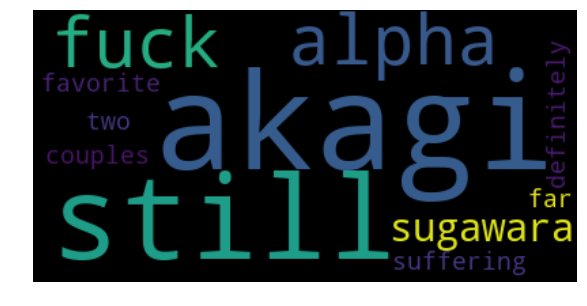

In [6]:
text = anime_comments.iloc[0]

wordcloud  = WordCloud().generate(text)

plt.rcParams['figure.figsize'] = [10,5]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

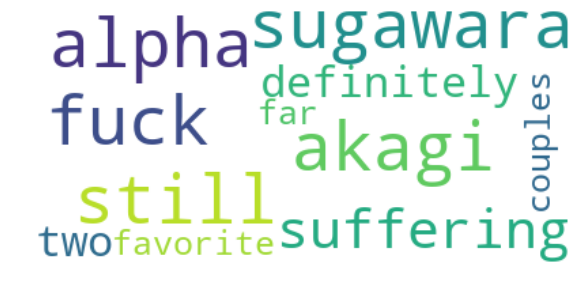

In [7]:
#lowe mac_font_size, change the background color and the maximum number of word.
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
text = " ".join(comm for comm in anime_comments)
print(f"There are {len(text)} Words in the combination of all comments")

There are 866301 Words in the combination of all comments


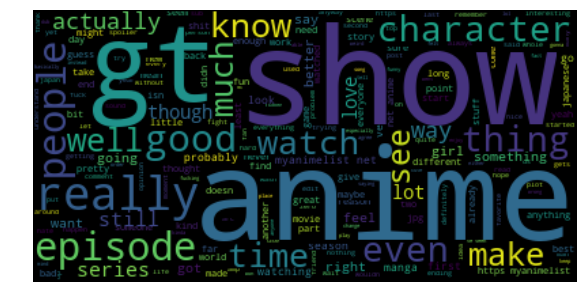

In [9]:
#Create stopwords list:

stopwords = set(STOPWORDS)
stopwords.update(["now", "yes", "number", "one", "think", "will", "redditor", "twitter", "reddit", "guy", "re", "don", 
                 "imgur", "the", "so"])

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
def generate_cloud(subreddit):
    """Generate the words cloud for a given category"""
    text = " ".join(comm for comm in data[data['subreddits']==subreddit].comments)
    stopwords = set(STOPWORDS)
    stopwords.update(["now", "yes", "number", "one", "think", "will", "redditor", "twitter", "reddit", "guy", "re", "don", 
                 "imgur", "the", "so"])
    wordcloud = WordCloud(stopwords=stopwords).generate(text)
    
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [11]:
subs = data['subreddits'].unique()
print(subs)

['hockey' 'nba' 'leagueoflegends' 'soccer' 'funny' 'movies' 'anime'
 'Overwatch' 'trees' 'GlobalOffensive' 'nfl' 'AskReddit' 'gameofthrones'
 'conspiracy' 'worldnews' 'wow' 'europe' 'canada' 'Music' 'baseball']


hockey


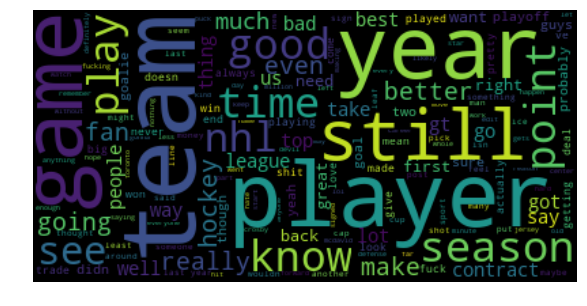

nba


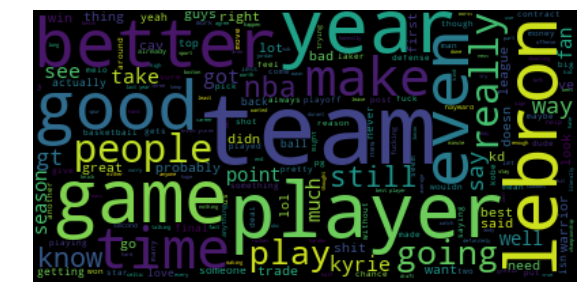

leagueoflegends


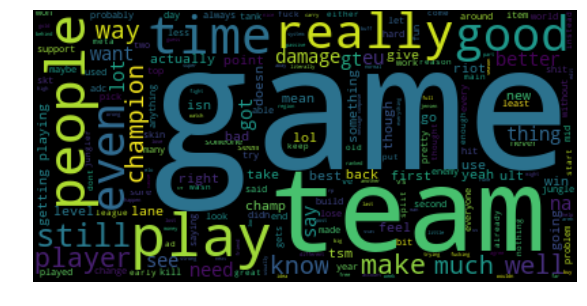

soccer


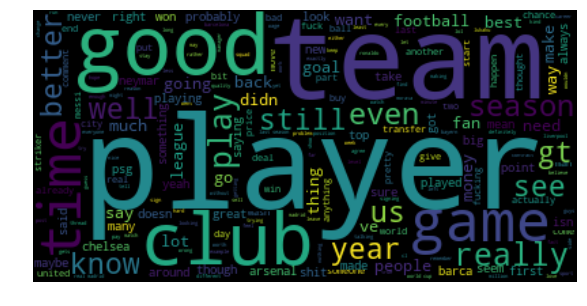

funny


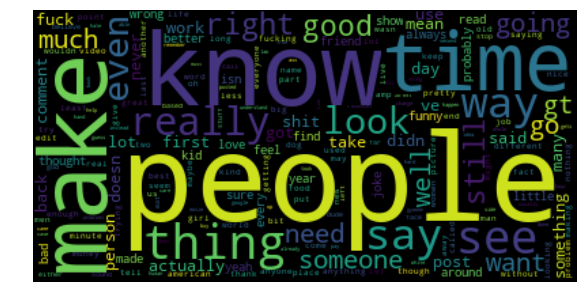

movies


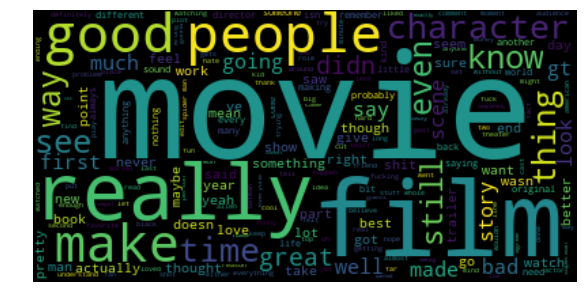

anime


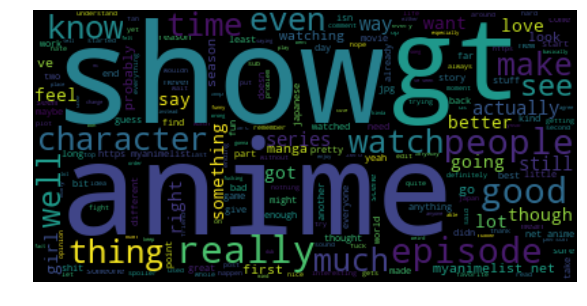

Overwatch


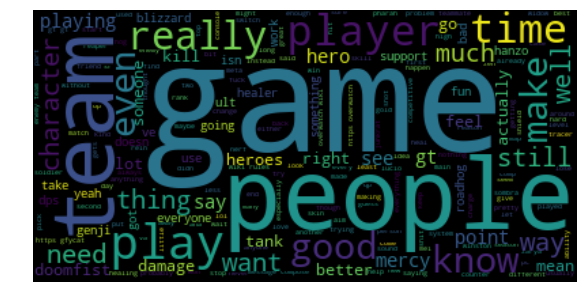

trees


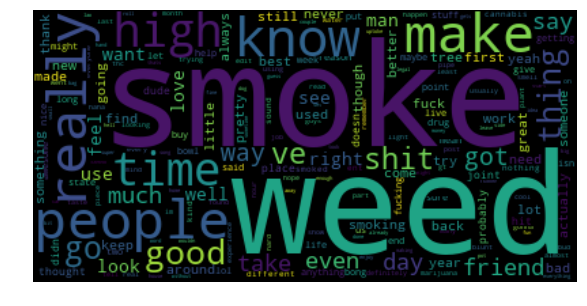

GlobalOffensive


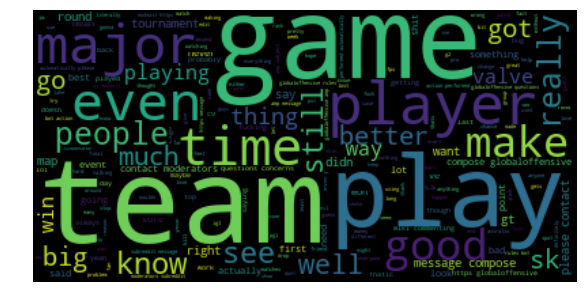

nfl


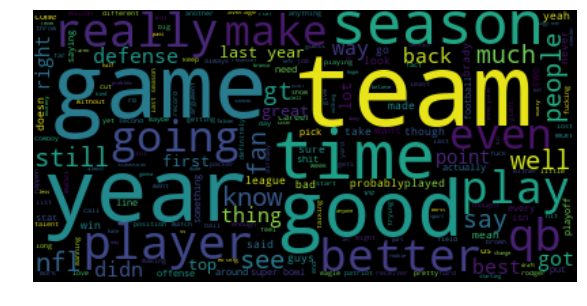

AskReddit


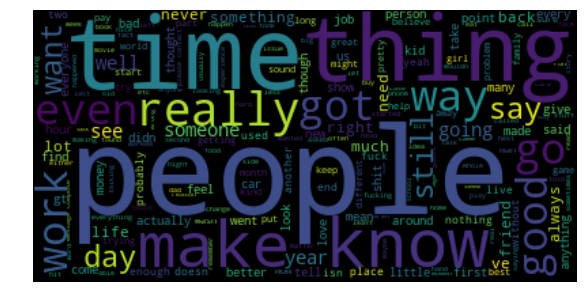

gameofthrones


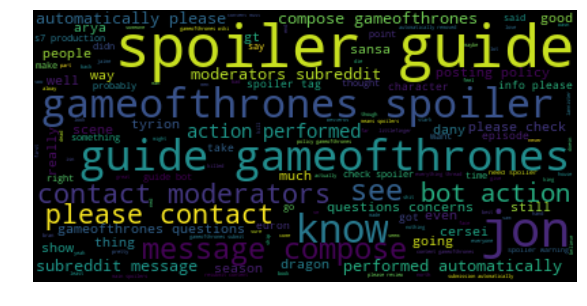

conspiracy


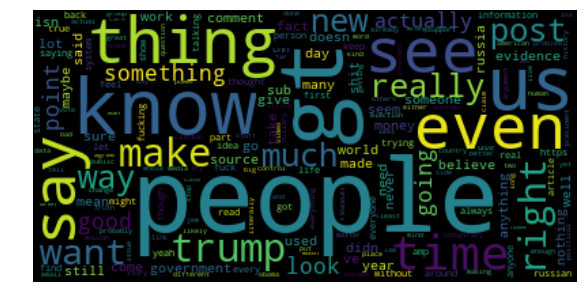

worldnews


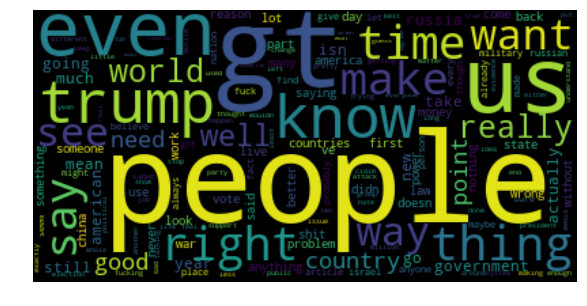

wow


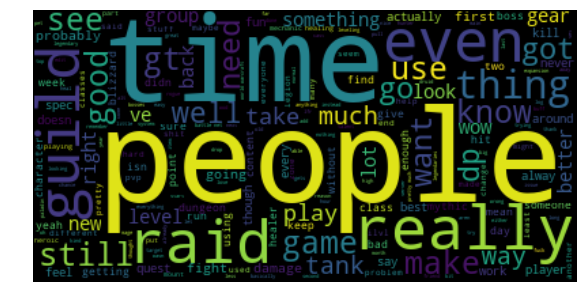

europe


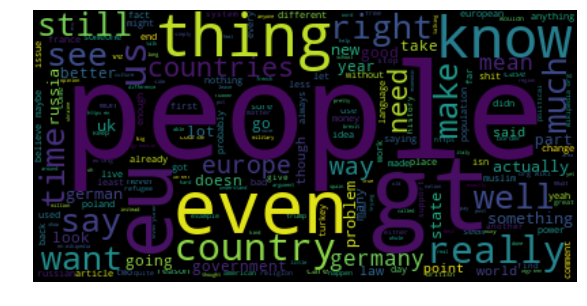

canada


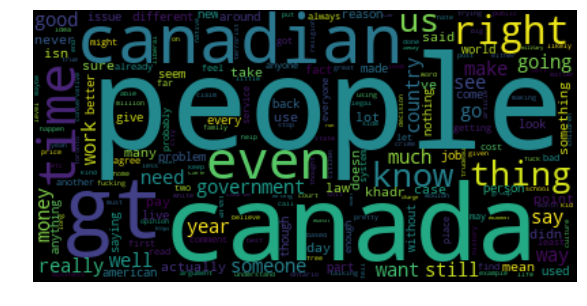

Music


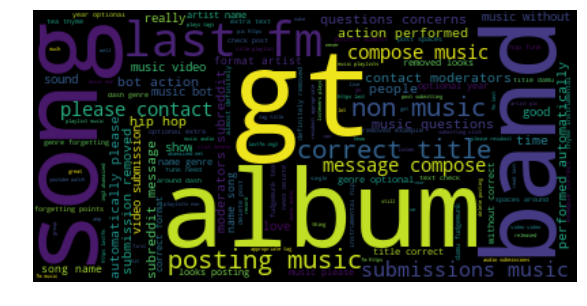

baseball


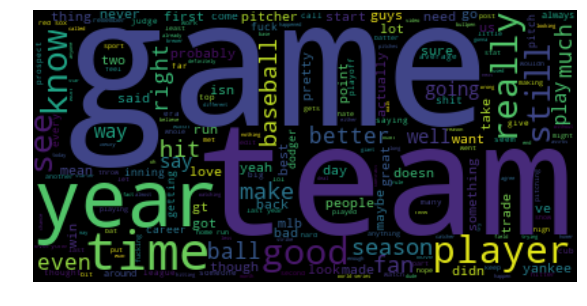

In [12]:
for sub in subs:
    print(sub)
    generate_cloud(sub)